![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [4]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [5]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [6]:
# Count nan values in each column
df.isna().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [7]:
# Print unique values in each column
for c in df.columns:
    print('{column}: {values}'.format(column=c, values=df[c].unique()))

Sex: ['2' 'Male' '8' nan '9']
MaritalStatus: ['1' '5' '3' '2' '4' '?' nan]
Age: [ 5.  3.  1.  6.  2.  7.  4. nan]
Education: ['4' '5' '2' '3' '6' nan '1' '?']
Occupation: ['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']
YearsInSf: ['5' '3' '4' '2' '1' '?']
DualIncome: [3 2 1]
HouseholdMembers: ['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']
Under18: [0 2 1 3 4 5 6 8 7 9]
HouseholdStatus: ['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'
 'Live with Parents' 'Live with Family' 'Live with Fam']
TypeOfHome: ['1' '3' '5' '2' '4' '?']
EthnicClass: ['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]
Language: ['?' '1' '2' '3' nan]
AnualIncome: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894'
 '7600000000000000004' '27591' '19997' '253600' '35500' '7' '7540' '?' nan
 '91000000000036' '468940000000000000000000000000' '5740' '460' '15500'
 '2460' '9460' '150500' '75500']


##### Above result revealed:
* Sex: '2' = 'Female'; 8, 9, nan are invalid
* MaritalStatus: 1-5 OK; ?, nan are invalid
* Age: 1-7 OK; nan is invalid
* Education: 1-6 OK; ?, nan are invalid
* Occupation: 1-9 OK; ?, nan are invalid
* YearsInSf: 1-5 OK; ? is invalid
* DualIncome: 1-3 OK
* HouseholdMembers: 1-9 OK; nan, ? are invalid
* Under18: 0-9 OK
* HouseholdStatus: strings OK; ?, nan are invalid
* TypeOfHome: 1-5 OK; ? is invalid
* EthnicClass: 1-8 OK; ?, nan are invalid
* Language: 1-3 OK; ?, nan are invalid
* AnnualIncome: ints OK; ?, nan are invalid

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [8]:
# Replace all '?' with nan
df = df.replace({'?': np.nan})

In [9]:
# Replace invalid values in df.Sex
df.Sex = df.Sex.replace({'2': 'Female', 
                         '8': np.nan, 
                         '9': np.nan})

In [10]:
# Remove all rows with at least one nan
df.dropna(how='any', axis=0, inplace=True)

In [11]:
# Count nan values in each column
df.isna().sum()

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         0
dtype: int64

In [12]:
# Print unique values in each column
for c in df.columns:
    print('{column}: {values}'.format(column=c, values=df[c].unique()))

Sex: ['Male' 'Female']
MaritalStatus: ['1' '5' '3' '2' '4']
Age: [5. 3. 1. 6. 2. 7. 4.]
Education: ['5' '2' '4' '3' '6' '1']
Occupation: ['5' '1' '6' '8' '9' '3' '2' '4' '7']
YearsInSf: ['5' '3' '4' '2' '1']
DualIncome: [3 2 1]
HouseholdMembers: ['5' '3' '4' '2' '1' '6' '7' '9' '8']
Under18: [2 1 0 3 4 5 6 8 7 9]
HouseholdStatus: ['Own' 'Rent' 'Live with Parents/Family' 'Rental' 'Live with Parents'
 'Live with Family' 'Live with Fam']
TypeOfHome: ['1' '3' '5' '2' '4']
EthnicClass: ['7' '5' '2' '3' '4' '8' '1' '6']
Language: ['1' '3' '2']
AnualIncome: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'
 '19997' '253600' '7' '7540' '91000000000036' '5740' '460' '2460' '9460'
 '150500' '75500']


---

All unique values appear valid now

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

Although the values valid, the value types are objects when they should be integers

In [13]:
# Check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6845 non-null object
MaritalStatus       6845 non-null object
Age                 6845 non-null float64
Education           6845 non-null object
Occupation          6845 non-null object
YearsInSf           6845 non-null object
DualIncome          6845 non-null int64
HouseholdMembers    6845 non-null object
Under18             6845 non-null int64
HouseholdStatus     6845 non-null object
TypeOfHome          6845 non-null object
EthnicClass         6845 non-null object
Language            6845 non-null object
AnualIncome         6845 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 802.1+ KB


In [14]:
# Change column types of numeric columns to integers; AnualIncome is large so make it 64-bit
df.MaritalStatus = df.MaritalStatus.astype('int32')
df.Age = df.Age.astype('int32')
df.Education = df.Education.astype('int32')
df.Occupation = df.Occupation.astype('int32')
df.YearsInSf = df.YearsInSf.astype('int32')
df.DualIncome = df.DualIncome.astype('int32')
df.HouseholdMembers = df.HouseholdMembers.astype('int32')
df.Under18 = df.Under18.astype('int32')
df.TypeOfHome = df.TypeOfHome.astype('int32')
df.EthnicClass = df.EthnicClass.astype('int32')
df.Language = df.Language.astype('int32')
df.AnualIncome = df.AnualIncome.astype('int64')

# Confirm types
df.info()

In [17]:
# Summarize statistics of df
df.describe()

,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,TypeOfHome,EthnicClass,Language,AnualIncome
count,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6845.000000,6.845000e+03
mean,2.998685,3.407889,3.892476,3.639737,4.212418,1.549744,2.863258,0.688240,1.820307,6.010665,1.116728,1.329441e+10
std,1.813281,1.609857,1.243620,2.508128,1.217514,0.737680,1.531188,1.082828,1.110032,1.739384,0.402675,1.099904e+12
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.000000e+00
25%,1.000000,2.000000,3.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,5.000000,1.000000,1.170300e+04
50%,3.000000,3.000000,4.000000,3.000000,5.000000,1.000000,3.000000,0.000000,1.000000,7.000000,1.000000,3.217100e+04
75%,5.000000,4.000000,5.000000,6.000000,5.000000,2.000000,4.000000,1.000000,3.000000,7.000000,1.000000,6.699400e+04
max,5.000000,7.000000,6.000000,9.000000,5.000000,3.000000,9.000000,9.000000,5.000000,8.000000,3.000000,9.100000e+13


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

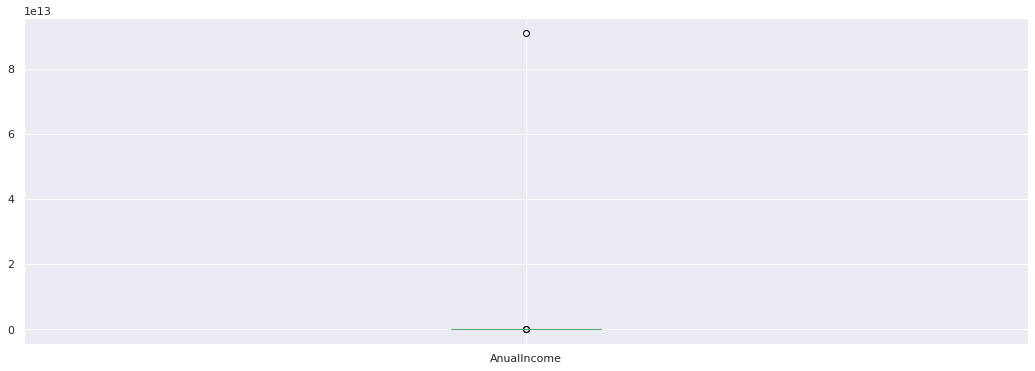

In [18]:
df.boxplot('AnualIncome')

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [19]:
# Create variable that is the stats table
anin_stats = df.AnualIncome.describe()

In [20]:
# IQR = Q3-Q1
iqr = anin_stats.loc['75%'] - anin_stats.loc['25%']

# upper limit = Q3 + IQR; lower limit = Q1 - IQR
upper_bound = anin_stats.loc['75%'] + iqr*1.5
lower_bound = anin_stats.loc['25%'] - iqr*1.5

# Convert outliers (above upper limit or below lower limit) to nan
df.AnualIncome.loc[(df.AnualIncome > upper_bound) | (df.AnualIncome < lower_bound)] = np.nan

In [21]:
# Check how many data points were converted to nan
df.AnualIncome.isna().sum()

3

In [22]:
# Remove all rows with nan
df.dropna(how='any', axis=0, inplace=True)

In [23]:
# See change in stats table
df.AnualIncome.describe()

count     6842.000000
mean     36024.101725
std      23609.524027
min          7.000000
25%      11703.000000
50%      32171.000000
75%      66994.000000
max      76004.000000
Name: AnualIncome, dtype: float64

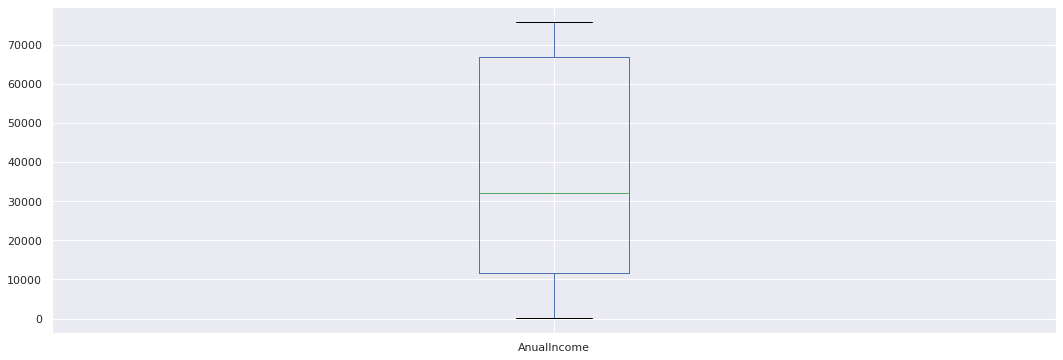

In [24]:
df.boxplot('AnualIncome')

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

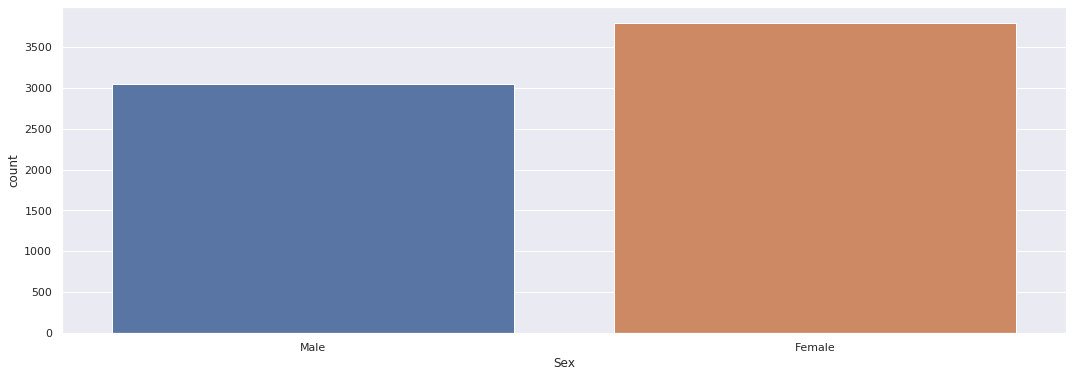

In [25]:
sns.countplot(df.Sex)

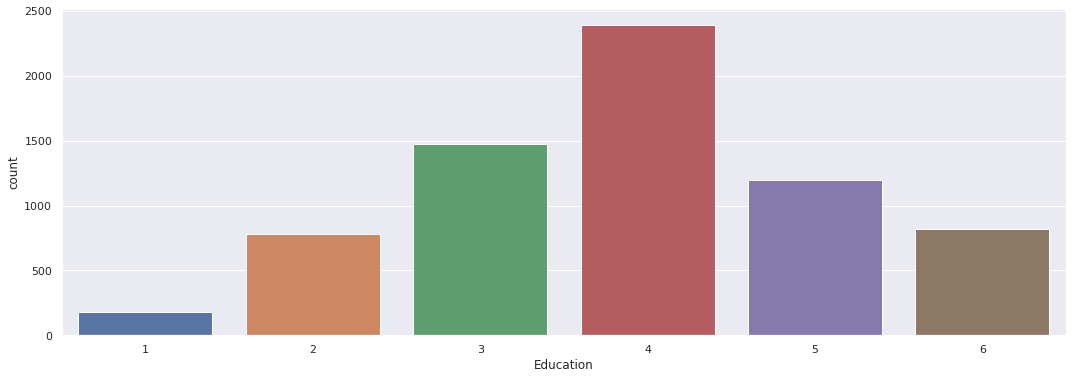

In [26]:
sns.countplot(df.Education)

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [27]:
df[['Sex', 'HouseholdStatus']].head(20)

,Sex,HouseholdStatus
2,Male,Own
3,Female,Rent
4,Female,Live with Parents/Family
5,Female,Live with Parents/Family
6,Male,Own
7,Male,Rent
8,Male,Rent
9,Male,Rent
10,Male,Rent
11,Male,Rent


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [28]:
df.MaritalStatus.loc[247]

1

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [29]:
df[df.Sex == 'Male'].Sex.count()

3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [30]:
df[df.HouseholdStatus == 'Live with Parents/Family'].HouseholdStatus.count()

1394

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [31]:
df.EthnicClass.mode()

0    7
dtype: int32

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [34]:
df.groupby('Occupation').AnualIncome.sum().sort_values(ascending=False)

Occupation
1    112422062.0
4     26058933.0
6     22635572.0
5     20808179.0
2     20156323.0
8     17567999.0
3     17262711.0
9      5489970.0
7      4075155.0
Name: AnualIncome, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)